In [1]:
%load_ext autoreload
%autoreload 2

import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import multiprocessing

#files containing the core algorithms
import temporal_difference
import function_approximation
import utils
import policy

In [2]:
env = gym.make('MountainCar-v0')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample())
env.close()

100%|██████████| 1000/1000 [00:30<00:00, 33.16it/s]


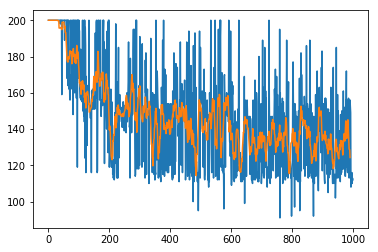

In [3]:
env = gym.make('MountainCar-v0')

discount_rate = 1
learning_rate = 1/16
lambda_return = 0.5

approximation_function = function_approximation.TileCoding(n_bins=10,
                                                           n_tilings=5,
                                                           observation_space=env.observation_space,
                                                           action_space=env.action_space)
agent = temporal_difference.TrueOnlineSARSA(env,discount_rate, learning_rate, lambda_return,approximation_function)
times= []
for episode in tqdm(range(1000)):
    t = agent.episode(env)
    times.append(t)

plt.plot(times)
n=10
plt.plot(np.convolve(times, np.ones((n,))/n, mode='valid'))

In [7]:
observation = env.reset()
for t in range(1000):
    env.render()
    a = agent.policy_greedy(env, observation)
    observation, reward, done, info = env.step(a)
    if done:
        break
    
env.close()

100%|██████████| 100/100 [00:01<00:00, 64.02it/s]


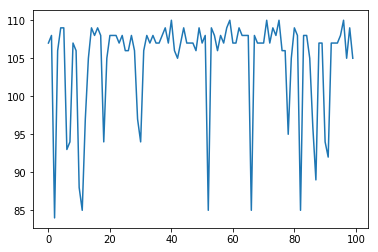

In [5]:
lenghts = []
for l in tqdm(range(100)):
    observation = env.reset()
    for t in range(1000):
        a = agent.policy_greedy(env, observation)
        observation, reward, done, info = env.step(a)
        if done:
            lenghts.append(t)
            break
            
plt.plot(lenghts)    